In [54]:
#import different databases
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
import sklearn as sk #this is the most popular library for statistics and machine learning
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [55]:
#I make a dataframe of the CSV file and show the first 5 results
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [56]:
df_subset = df[df['price'] > 30000]
df_subset.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


Text(0,0.5,'Price')

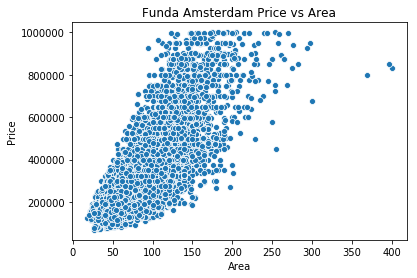

In [57]:
sns.scatterplot(data=df_subset, x="area", y="price")
plt.title("Funda Amsterdam Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")

Text(0,0.5,'Price')

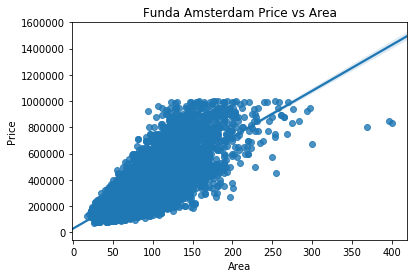

In [58]:
sns.regplot(data=df_subset, x="area", y="price")
plt.title("Funda Amsterdam Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")

In [59]:
#To use sk-learn, we need to create lists of the two variables
#Tote that you need to use [[]] with x, because x could be multiple variables (each variable is a list)
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.intercept_ #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 1139.56 + 207124.91X


𝑌=b_0 + B_1 𝑋+e
b_0 = 1139.56
b_1 = 207124.91
$y= 1139.56 + 207124.91x$

In [60]:
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,330197.492903
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,260684.274834
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,339313.980519
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,273219.445306
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,278917.250066
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,349570.029086
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,280056.811018
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,383756.857644
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,303987.591008
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,283475.493873


In [61]:
#Predict the price for a house of 70 m2, so X is 70
X = 70
y = 1139.56 + 207124.91 * X
print("The prediction of the price of a house of " + str(X) + "m2 is " + str(y))

The prediction of the price of a house of 70m2 is 14499883.260000002


In [62]:
#use the predict function for the 70m2 house:
lm.predict(70)

array([286894.17672918])

In [63]:
df[df['address']=="Slichtenhorststraat 10"].head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,234500,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983,337034.858615


In [64]:
#To use sk-learn, we need to create lists of the two variables
#Tote that you need to use [[]] with x, because x could be multiple variables (each variable is a list)
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

df['area'] = lm.predict(x) #generate the predictions and add them to the dataframe
df['resid'] = df['price'] - df['price_p'] #get the residuals by subtracting the prediction from the actual views

Text(0,0.5,'Residuals (price)')

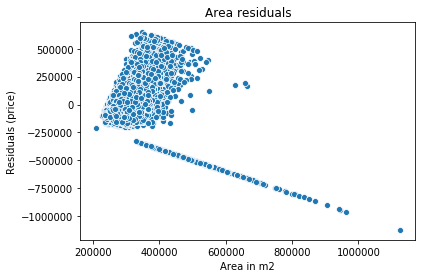

In [65]:
sns.scatterplot(x="area", y="resid", data=df)
plt.title("Area residuals")
plt.xlabel("Area in m2")
plt.ylabel("Residuals (price)")

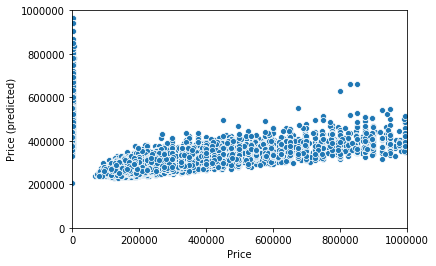

In [66]:
sns.scatterplot(x='price',y='price_p',data=df)
plt.xlim(0, 1000000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 1000000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

In [67]:
r2score = r2_score(df['price'], df['price_p'])
print(f'The R^2 score is: {r2score}')

The R2 score is: 0.09764871906008399


In [72]:
RMSE = math.sqrt(mean_squared_error(df['price'], df['price_p']))
print(f'The roost mean squared error is: {RMSE} euro')

The roost mean squared error is: 168566.4358478545 euro


The R^2 is nearly 10 percent, so it is very low. The model is because of this low percentage not realistic.<br>
The RMSE score is €168566.44, which means that the price is €168566.44 off from the prediction. <BR>
The cheap houses are predicted better because the dots are closer to each other and more in a straight line.